In [1]:
using Distributed;
addprocs(4);

@everywhere begin
    using Pkg
    Pkg.activate(String(@__DIR__) * "/..")
    Pkg.instantiate()
end

println(workers())

      From worker 4:	 Activating environment at `~/Workspace/NodaLab/Scripts/Conduction/Project.toml`


 Activating environment at `~/Workspace/NodaLab/Scripts/Conduction/Project.toml`


      From worker 2:	 Activating environment at `~/Workspace/NodaLab/Scripts/Conduction/Project.toml`
      From worker 5:	 Activating environment at `~/Workspace/NodaLab/Scripts/Conduction/Project.toml`
      From worker 3:	 Activating environment at `~/Workspace/NodaLab/Scripts/Conduction/Project.toml`
[2, 3, 4, 5]


In [2]:
@everywhere begin
    include("../src/Conduction.jl");
    using Plots, VegaLite, LaTeXStrings, QuadGK
    import PyPlot
end

In [3]:
semiconductor = Conduction.Semiconductor(
    1.38 * 10^-23, # Boltzman constant (J.K^-1)
    1.6*10^-19, # Electron's charge (C)
    10^7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
    0.1 * 1.6*10^-19, # Mode effect of the phonons (J)
    2.1 * 10^18, # intrinsic semiconductor's density (cm^-3)
    2.1 * 10^18, # Doping states' density (cm^-3)
    0.1 * 1.6 * 10^-19, # Energy to a vacant target site (J)
    -2*10^5, # Field (V.cm^-1)
    10^13, # Base electron jump rate
    -10.0, # Fermi level (J)
    2.7, # Intrinsic semiconductor's gaussian width (J)
    2.7 # Doping states' gaussian width (J)
);

In [3]:
T = 300
range = -10:0.1:10
res_t_VRH = pmap(x -> Conduction.t(semiconductor, Conduction.RnnVRH(semiconductor, x, T), x, T), range);
res_t_Perco = pmap(x -> Conduction.t(semiconductor, Conduction.RnnPercoField(semiconductor, x, T), x, T), range);

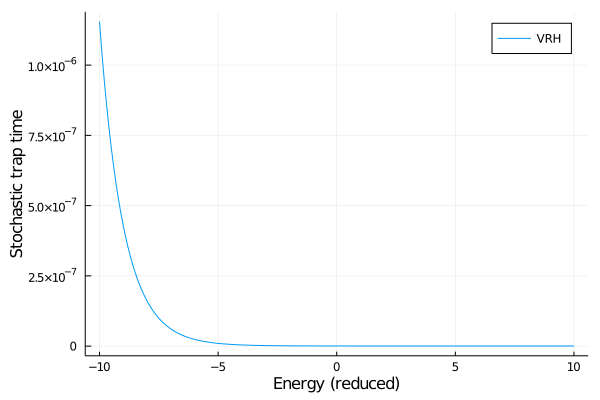

In [4]:
plot(range, res_t_VRH, xlabel="Energy (reduced)", ylabel="Stochastic trap time", label="VRH")

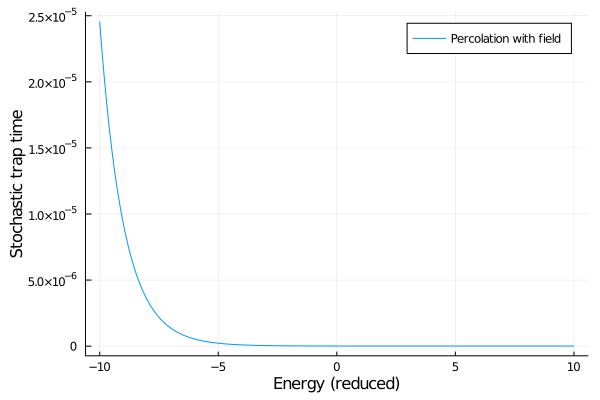

In [5]:
plot(range, res_t_Perco, xlabel="Energy (reduced)", ylabel="Stochastic trap time", label="Percolation with field")

In [7]:
mobility = Conduction.average_density(
    x -> Conduction.electronMobility(semiconductor, Conduction.RnnVRH, x, 300)
    * Conduction.DOS(semiconductor, x, 300)
    * Conduction.F(semiconductor, x, 300)) / Conduction.average_density(
    x -> Conduction.DOS(semiconductor, x, 300)
    * Conduction.F(semiconductor, x, 300))

4.123415607559728e-5